In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")


In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

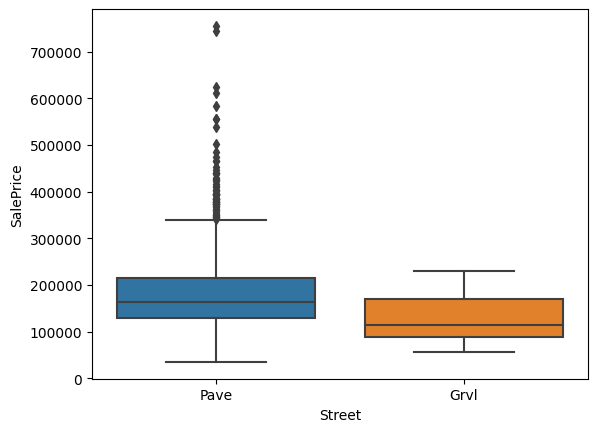

In [5]:
import seaborn as sns
ax = sns.boxplot(x="Street", y="SalePrice", data=train_data)

In [6]:
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [7]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
datas = [train_data,test_data]
full_data = pd.concat(datas)
full_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [9]:
full_data['BedroomAbvGr'].describe()

count    2919.000000
mean        2.860226
std         0.822693
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

In [10]:
full_data = full_data[['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Neighborhood','YearBuilt','HouseStyle','OverallCond','BsmtFinSF1','CentralAir','1stFlrSF','BedroomAbvGr','GarageCars','PavedDrive','OpenPorchSF','YrSold','SalePrice']]

In [11]:
full_data.describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,1971.312778,5.564577,441.423235,1159.581706,2.860226,1.766621,47.486811,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,30.291442,1.113131,455.610826,392.362079,0.822693,0.761624,67.575493,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1872.000000,1.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,1953.500000,5.000000,0.000000,876.000000,2.000000,1.000000,0.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,1973.000000,5.000000,368.500000,1082.000000,3.000000,2.000000,26.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,2001.000000,6.000000,733.000000,1387.500000,3.000000,2.000000,70.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,2010.000000,9.000000,5644.000000,5095.000000,8.000000,5.000000,742.000000,2010.000000,755000.000000


In [12]:
full_data = full_data.drop(columns=['LotFrontage'])
full_data.describe()

,MSSubClass,LotArea,YearBuilt,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,10168.114080,1971.312778,5.564577,441.423235,1159.581706,2.860226,1.766621,47.486811,2007.792737,180921.195890
std,42.517628,7886.996359,30.291442,1.113131,455.610826,392.362079,0.822693,0.761624,67.575493,1.314964,79442.502883
min,20.000000,1300.000000,1872.000000,1.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,7478.000000,1953.500000,5.000000,0.000000,876.000000,2.000000,1.000000,0.000000,2007.000000,129975.000000
50%,50.000000,9453.000000,1973.000000,5.000000,368.500000,1082.000000,3.000000,2.000000,26.000000,2008.000000,163000.000000
75%,70.000000,11570.000000,2001.000000,6.000000,733.000000,1387.500000,3.000000,2.000000,70.000000,2009.000000,214000.000000
max,190.000000,215245.000000,2010.000000,9.000000,5644.000000,5095.000000,8.000000,5.000000,742.000000,2010.000000,755000.000000


In [13]:
full_data.fillna({'BsmtFinSF1':441, 'GarageCars':2}, inplace=True)
full_data.describe()

,MSSubClass,LotArea,YearBuilt,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.00000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,10168.114080,1971.312778,5.564577,441.42309,1159.581706,2.860226,1.766701,47.486811,2007.792737,180921.195890
std,42.517628,7886.996359,30.291442,1.113131,455.53275,392.362079,0.822693,0.761506,67.575493,1.314964,79442.502883
min,20.000000,1300.000000,1872.000000,1.000000,0.00000,334.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,7478.000000,1953.500000,5.000000,0.00000,876.000000,2.000000,1.000000,0.000000,2007.000000,129975.000000
50%,50.000000,9453.000000,1973.000000,5.000000,369.00000,1082.000000,3.000000,2.000000,26.000000,2008.000000,163000.000000
75%,70.000000,11570.000000,2001.000000,6.000000,733.00000,1387.500000,3.000000,2.000000,70.000000,2009.000000,214000.000000
max,190.000000,215245.000000,2010.000000,9.000000,5644.00000,5095.000000,8.000000,5.000000,742.000000,2010.000000,755000.000000


In [14]:
full_data[ 'PavedDrive'].value_counts()

PavedDrive
Y    2641
N     216
P      62
Name: count, dtype: int64

In [15]:
full_data = full_data.drop(columns=['Neighborhood'])

In [16]:
full_data

,MSSubClass,MSZoning,LotArea,Street,YearBuilt,HouseStyle,OverallCond,BsmtFinSF1,CentralAir,1stFlrSF,BedroomAbvGr,GarageCars,PavedDrive,OpenPorchSF,YrSold,SalePrice
0,60,RL,8450,Pave,2003,2Story,5,706.0,Y,856,3,2.0,Y,61,2008,208500.0
1,20,RL,9600,Pave,1976,1Story,8,978.0,Y,1262,3,2.0,Y,0,2007,181500.0
2,60,RL,11250,Pave,2001,2Story,5,486.0,Y,920,3,2.0,Y,42,2008,223500.0
3,70,RL,9550,Pave,1915,2Story,5,216.0,Y,961,3,3.0,Y,35,2006,140000.0
4,60,RL,14260,Pave,2000,2Story,5,655.0,Y,1145,4,3.0,Y,84,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,1936,Pave,1970,2Story,7,0.0,Y,546,3,0.0,Y,0,2006,NaN
1455,160,RM,1894,Pave,1970,2Story,5,252.0,Y,546,3,1.0,Y,24,2006,NaN
1456,20,RL,20000,Pave,1960,1Story,7,1224.0,Y,1224,4,2.0,Y,0,2006,NaN
1457,85,RL,10441,Pave,1992,SFoyer,5,337.0,Y,970,3,0.0,Y,32,2006,NaN


In [17]:
# AGE OF HOUSE WHEN SOLD 
full_data['Age_when_sold'] = full_data['YrSold'] - full_data['YearBuilt']
full_data = full_data.drop(columns=['YearBuilt','YrSold'])
full_data

,MSSubClass,MSZoning,LotArea,Street,HouseStyle,OverallCond,BsmtFinSF1,CentralAir,1stFlrSF,BedroomAbvGr,GarageCars,PavedDrive,OpenPorchSF,SalePrice,Age_when_sold
0,60,RL,8450,Pave,2Story,5,706.0,Y,856,3,2.0,Y,61,208500.0,5
1,20,RL,9600,Pave,1Story,8,978.0,Y,1262,3,2.0,Y,0,181500.0,31
2,60,RL,11250,Pave,2Story,5,486.0,Y,920,3,2.0,Y,42,223500.0,7
3,70,RL,9550,Pave,2Story,5,216.0,Y,961,3,3.0,Y,35,140000.0,91
4,60,RL,14260,Pave,2Story,5,655.0,Y,1145,4,3.0,Y,84,250000.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,1936,Pave,2Story,7,0.0,Y,546,3,0.0,Y,0,NaN,36
1455,160,RM,1894,Pave,2Story,5,252.0,Y,546,3,1.0,Y,24,NaN,36
1456,20,RL,20000,Pave,1Story,7,1224.0,Y,1224,4,2.0,Y,0,NaN,46
1457,85,RL,10441,Pave,SFoyer,5,337.0,Y,970,3,0.0,Y,32,NaN,14


In [18]:
full_data = pd.get_dummies(full_data, columns=['MSZoning','Street','HouseStyle','CentralAir','PavedDrive'], drop_first=True, dtype=int)

In [19]:
full_data

,MSSubClass,LotArea,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,SalePrice,Age_when_sold,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,CentralAir_Y,PavedDrive_P,PavedDrive_Y
0,60,8450,5,706.0,856,3,2.0,61,208500.0,5,...,0,0,0,0,1,0,0,1,0,1
1,20,9600,8,978.0,1262,3,2.0,0,181500.0,31,...,0,1,0,0,0,0,0,1,0,1
2,60,11250,5,486.0,920,3,2.0,42,223500.0,7,...,0,0,0,0,1,0,0,1,0,1
3,70,9550,5,216.0,961,3,3.0,35,140000.0,91,...,0,0,0,0,1,0,0,1,0,1
4,60,14260,5,655.0,1145,4,3.0,84,250000.0,8,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,7,0.0,546,3,0.0,0,NaN,36,...,0,0,0,0,1,0,0,1,0,1
1455,160,1894,5,252.0,546,3,1.0,24,NaN,36,...,0,0,0,0,1,0,0,1,0,1
1456,20,20000,7,1224.0,1224,4,2.0,0,NaN,46,...,0,1,0,0,0,0,0,1,0,1
1457,85,10441,5,337.0,970,3,0.0,32,NaN,14,...,0,0,0,0,0,1,0,1,0,1


In [20]:
full_data['MSSubClass'].value_counts().sort_values(ascending=False).head(15)

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
Name: count, dtype: int64

In [21]:
top_10 = [x for x in full_data['MSSubClass'].value_counts().sort_values(ascending=False).head(10).index]
top_10

[20, 60, 50, 120, 30, 70, 160, 80, 90, 190]

In [22]:
# for label in top_10:  
#     full_data[label] = np.where(full_data['MSSubClass'] == label,1, 0)

In [23]:
def one_hot_top(df, variable, top_10_labels):
    for label in top_10_labels:
        df[variable+'_'+str(label)] = np.where(full_data[variable]==label, 1, 0)
        

one_hot_top(full_data,'MSSubClass',top_10)
full_data.head()

,MSSubClass,LotArea,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,SalePrice,Age_when_sold,...,MSSubClass_20,MSSubClass_60,MSSubClass_50,MSSubClass_120,MSSubClass_30,MSSubClass_70,MSSubClass_160,MSSubClass_80,MSSubClass_90,MSSubClass_190
0,60,8450,5,706.0,856,3,2.0,61,208500.0,5,...,0,1,0,0,0,0,0,0,0,0
1,20,9600,8,978.0,1262,3,2.0,0,181500.0,31,...,1,0,0,0,0,0,0,0,0,0
2,60,11250,5,486.0,920,3,2.0,42,223500.0,7,...,0,1,0,0,0,0,0,0,0,0
3,70,9550,5,216.0,961,3,3.0,35,140000.0,91,...,0,0,0,0,0,1,0,0,0,0
4,60,14260,5,655.0,1145,4,3.0,84,250000.0,8,...,0,1,0,0,0,0,0,0,0,0


In [24]:
full_data

,MSSubClass,LotArea,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,SalePrice,Age_when_sold,...,MSSubClass_20,MSSubClass_60,MSSubClass_50,MSSubClass_120,MSSubClass_30,MSSubClass_70,MSSubClass_160,MSSubClass_80,MSSubClass_90,MSSubClass_190
0,60,8450,5,706.0,856,3,2.0,61,208500.0,5,...,0,1,0,0,0,0,0,0,0,0
1,20,9600,8,978.0,1262,3,2.0,0,181500.0,31,...,1,0,0,0,0,0,0,0,0,0
2,60,11250,5,486.0,920,3,2.0,42,223500.0,7,...,0,1,0,0,0,0,0,0,0,0
3,70,9550,5,216.0,961,3,3.0,35,140000.0,91,...,0,0,0,0,0,1,0,0,0,0
4,60,14260,5,655.0,1145,4,3.0,84,250000.0,8,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,7,0.0,546,3,0.0,0,NaN,36,...,0,0,0,0,0,0,1,0,0,0
1455,160,1894,5,252.0,546,3,1.0,24,NaN,36,...,0,0,0,0,0,0,1,0,0,0
1456,20,20000,7,1224.0,1224,4,2.0,0,NaN,46,...,1,0,0,0,0,0,0,0,0,0
1457,85,10441,5,337.0,970,3,0.0,32,NaN,14,...,0,0,0,0,0,0,0,0,0,0


In [25]:
full_data.describe()

,MSSubClass,LotArea,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,SalePrice,Age_when_sold,...,MSSubClass_20,MSSubClass_60,MSSubClass_50,MSSubClass_120,MSSubClass_30,MSSubClass_70,MSSubClass_160,MSSubClass_80,MSSubClass_90,MSSubClass_190
count,2919.000000,2919.000000,2919.000000,2919.00000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,10168.114080,5.564577,441.42309,1159.581706,2.860226,1.766701,47.486811,180921.195890,36.479959,...,0.369647,0.196985,0.098321,0.062350,0.047619,0.043851,0.043851,0.040425,0.037342,0.020898
std,42.517628,7886.996359,1.113131,455.53275,392.362079,0.822693,0.761506,67.575493,79442.502883,30.336182,...,0.482792,0.397789,0.297800,0.241832,0.212995,0.204798,0.204798,0.196987,0.189630,0.143066
min,20.000000,1300.000000,1.000000,0.00000,334.000000,0.000000,0.000000,0.000000,34900.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7478.000000,5.000000,0.00000,876.000000,2.000000,1.000000,0.000000,129975.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,9453.000000,5.000000,369.00000,1082.000000,3.000000,2.000000,26.000000,163000.000000,35.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,11570.000000,6.000000,733.00000,1387.500000,3.000000,2.000000,70.000000,214000.000000,54.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,190.000000,215245.000000,9.000000,5644.00000,5095.000000,8.000000,5.000000,742.000000,755000.000000,136.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
train_data = full_data.iloc[:1460,:]
test_data = full_data.iloc[1460:,:]

In [27]:
train_data

,MSSubClass,LotArea,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,SalePrice,Age_when_sold,...,MSSubClass_20,MSSubClass_60,MSSubClass_50,MSSubClass_120,MSSubClass_30,MSSubClass_70,MSSubClass_160,MSSubClass_80,MSSubClass_90,MSSubClass_190
0,60,8450,5,706.0,856,3,2.0,61,208500.0,5,...,0,1,0,0,0,0,0,0,0,0
1,20,9600,8,978.0,1262,3,2.0,0,181500.0,31,...,1,0,0,0,0,0,0,0,0,0
2,60,11250,5,486.0,920,3,2.0,42,223500.0,7,...,0,1,0,0,0,0,0,0,0,0
3,70,9550,5,216.0,961,3,3.0,35,140000.0,91,...,0,0,0,0,0,1,0,0,0,0
4,60,14260,5,655.0,1145,4,3.0,84,250000.0,8,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,5,0.0,953,3,2.0,40,175000.0,8,...,0,1,0,0,0,0,0,0,0,0
1456,20,13175,6,790.0,2073,3,2.0,0,210000.0,32,...,1,0,0,0,0,0,0,0,0,0
1457,70,9042,9,275.0,1188,4,1.0,60,266500.0,69,...,0,0,0,0,0,1,0,0,0,0
1458,20,9717,6,49.0,1078,2,1.0,0,142125.0,60,...,1,0,0,0,0,0,0,0,0,0


In [28]:
full_data = full_data.drop(columns=['MSSubClass'])

In [29]:
full_data

,LotArea,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,SalePrice,Age_when_sold,MSZoning_FV,...,MSSubClass_20,MSSubClass_60,MSSubClass_50,MSSubClass_120,MSSubClass_30,MSSubClass_70,MSSubClass_160,MSSubClass_80,MSSubClass_90,MSSubClass_190
0,8450,5,706.0,856,3,2.0,61,208500.0,5,0,...,0,1,0,0,0,0,0,0,0,0
1,9600,8,978.0,1262,3,2.0,0,181500.0,31,0,...,1,0,0,0,0,0,0,0,0,0
2,11250,5,486.0,920,3,2.0,42,223500.0,7,0,...,0,1,0,0,0,0,0,0,0,0
3,9550,5,216.0,961,3,3.0,35,140000.0,91,0,...,0,0,0,0,0,1,0,0,0,0
4,14260,5,655.0,1145,4,3.0,84,250000.0,8,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,7,0.0,546,3,0.0,0,NaN,36,0,...,0,0,0,0,0,0,1,0,0,0
1455,1894,5,252.0,546,3,1.0,24,NaN,36,0,...,0,0,0,0,0,0,1,0,0,0
1456,20000,7,1224.0,1224,4,2.0,0,NaN,46,0,...,1,0,0,0,0,0,0,0,0,0
1457,10441,5,337.0,970,3,0.0,32,NaN,14,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
full_data.describe()

,LotArea,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,SalePrice,Age_when_sold,MSZoning_FV,...,MSSubClass_20,MSSubClass_60,MSSubClass_50,MSSubClass_120,MSSubClass_30,MSSubClass_70,MSSubClass_160,MSSubClass_80,MSSubClass_90,MSSubClass_190
count,2919.000000,2919.000000,2919.00000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,10168.114080,5.564577,441.42309,1159.581706,2.860226,1.766701,47.486811,180921.195890,36.479959,0.047619,...,0.369647,0.196985,0.098321,0.062350,0.047619,0.043851,0.043851,0.040425,0.037342,0.020898
std,7886.996359,1.113131,455.53275,392.362079,0.822693,0.761506,67.575493,79442.502883,30.336182,0.212995,...,0.482792,0.397789,0.297800,0.241832,0.212995,0.204798,0.204798,0.196987,0.189630,0.143066
min,1300.000000,1.000000,0.00000,334.000000,0.000000,0.000000,0.000000,34900.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7478.000000,5.000000,0.00000,876.000000,2.000000,1.000000,0.000000,129975.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9453.000000,5.000000,369.00000,1082.000000,3.000000,2.000000,26.000000,163000.000000,35.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11570.000000,6.000000,733.00000,1387.500000,3.000000,2.000000,70.000000,214000.000000,54.500000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,215245.000000,9.000000,5644.00000,5095.000000,8.000000,5.000000,742.000000,755000.000000,136.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
full_data.columns

Index(['LotArea', 'OverallCond', 'BsmtFinSF1', '1stFlrSF', 'BedroomAbvGr',
       'GarageCars', 'OpenPorchSF', 'SalePrice', 'Age_when_sold',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'CentralAir_Y', 'PavedDrive_P',
       'PavedDrive_Y', 'MSSubClass_20', 'MSSubClass_60', 'MSSubClass_50',
       'MSSubClass_120', 'MSSubClass_30', 'MSSubClass_70', 'MSSubClass_160',
       'MSSubClass_80', 'MSSubClass_90', 'MSSubClass_190'],
      dtype='object')

In [32]:
feature_cols = ['LotArea',    'OverallCond',     'BsmtFinSF1',       '1stFlrSF',
         'BedroomAbvGr',     'GarageCars',    'OpenPorchSF',     
        'Age_when_sold',    'MSZoning_FV',    'MSZoning_RH',    'MSZoning_RL',
          'MSZoning_RM',    'Street_Pave', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl',   'CentralAir_Y',   'PavedDrive_P',
         'PavedDrive_Y',   'MSSubClass_20',
        'MSSubClass_60',  'MSSubClass_50', 'MSSubClass_120',  'MSSubClass_30',
        'MSSubClass_70', 'MSSubClass_160',  'MSSubClass_80',  'MSSubClass_90',
       'MSSubClass_190']
X_train = train_data[feature_cols] # Features
y_train = train_data.SalePrice # Target variable

X_test = test_data[feature_cols] 
y_test = test_data.SalePrice

In [33]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [34]:
X_train 

,LotArea,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,Age_when_sold,MSZoning_FV,MSZoning_RH,...,MSSubClass_20,MSSubClass_60,MSSubClass_50,MSSubClass_120,MSSubClass_30,MSSubClass_70,MSSubClass_160,MSSubClass_80,MSSubClass_90,MSSubClass_190
0,8450,5,706.0,856,3,2.0,61,5,0,0,...,0,1,0,0,0,0,0,0,0,0
1,9600,8,978.0,1262,3,2.0,0,31,0,0,...,1,0,0,0,0,0,0,0,0,0
2,11250,5,486.0,920,3,2.0,42,7,0,0,...,0,1,0,0,0,0,0,0,0,0
3,9550,5,216.0,961,3,3.0,35,91,0,0,...,0,0,0,0,0,1,0,0,0,0
4,14260,5,655.0,1145,4,3.0,84,8,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,5,0.0,953,3,2.0,40,8,0,0,...,0,1,0,0,0,0,0,0,0,0
1456,13175,6,790.0,2073,3,2.0,0,32,0,0,...,1,0,0,0,0,0,0,0,0,0
1457,9042,9,275.0,1188,4,1.0,60,69,0,0,...,0,0,0,0,0,1,0,0,0,0
1458,9717,6,49.0,1078,2,1.0,0,60,0,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
X_train[:] = X_train_norm
X_train

/tmp/ipykernel_18/4023056411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[:] = X_train_norm
/tmp/ipykernel_18/4023056411.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0334198  0.03879502 0.04650728 ... 0.03618687 0.03934189 0.04037019]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train[:] = X_train_norm
/tmp/ipykernel_18/4023056411.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.5   0.875 0.5   ... 1.    0.625 0.625]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train[:] = X_train_no

,LotArea,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,Age_when_sold,MSZoning_FV,MSZoning_RH,...,MSSubClass_20,MSSubClass_60,MSSubClass_50,MSSubClass_120,MSSubClass_30,MSSubClass_70,MSSubClass_160,MSSubClass_80,MSSubClass_90,MSSubClass_190
0,0.033420,0.500,0.125089,0.119780,0.375,0.50,0.111517,0.036765,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.038795,0.875,0.173281,0.212942,0.375,0.50,0.000000,0.227941,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.046507,0.500,0.086109,0.134465,0.375,0.50,0.076782,0.051471,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.038561,0.500,0.038271,0.143873,0.375,0.75,0.063985,0.669118,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.060576,0.500,0.116052,0.186095,0.500,0.75,0.153565,0.058824,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.030929,0.500,0.000000,0.142038,0.375,0.50,0.073126,0.058824,0,0,...,0,1,0,0,0,0,0,0,0,0
1456,0.055505,0.625,0.139972,0.399036,0.375,0.50,0.000000,0.235294,0,0,...,1,0,0,0,0,0,0,0,0,0
1457,0.036187,1.000,0.048724,0.195961,0.500,0.25,0.109689,0.507353,0,0,...,0,0,0,0,0,1,0,0,0,0
1458,0.039342,0.625,0.008682,0.170721,0.250,0.25,0.000000,0.441176,0,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
X_test[:] = X_test_norm
X_test

/tmp/ipykernel_18/83456485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[:] = X_test_norm
/tmp/ipykernel_18/83456485.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.04824604 0.06060904 0.05856645 ... 0.08740564 0.04272593 0.03892122]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test[:] = X_test_norm
/tmp/ipykernel_18/83456485.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.625 0.625 0.5   ... 0.75  0.5   0.5  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test[:] = X_test_norm
/tmp/ipyk

,LotArea,OverallCond,BsmtFinSF1,1stFlrSF,BedroomAbvGr,GarageCars,OpenPorchSF,Age_when_sold,MSZoning_FV,MSZoning_RH,...,MSSubClass_20,MSSubClass_60,MSSubClass_50,MSSubClass_120,MSSubClass_30,MSSubClass_70,MSSubClass_160,MSSubClass_80,MSSubClass_90,MSSubClass_190
0,0.048246,0.625,0.082920,0.128958,0.250,0.25,0.000000,0.360294,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0.060609,0.625,0.163536,0.228316,0.375,0.25,0.065814,0.382353,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.058566,0.500,0.140149,0.136301,0.375,0.50,0.062157,0.095588,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.040562,0.625,0.106662,0.135842,0.375,0.50,0.065814,0.088235,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.017318,0.500,0.046598,0.217072,0.250,0.50,0.149909,0.132353,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.002973,0.750,0.000000,0.048646,0.375,0.00,0.000000,0.264706,0,0,...,0,0,0,0,0,0,1,0,0,0
1455,0.002776,0.500,0.044649,0.048646,0.375,0.25,0.043876,0.264706,0,0,...,0,0,0,0,0,0,1,0,0,0
1456,0.087406,0.750,0.216867,0.204222,0.500,0.50,0.000000,0.338235,0,0,...,1,0,0,0,0,0,0,0,0,0
1457,0.042726,0.500,0.059709,0.145939,0.375,0.00,0.058501,0.102941,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_train_norm

array([[0.0334198 , 0.5       , 0.12508859, ..., 0.        , 0.        ,
        0.        ],
       [0.03879502, 0.875     , 0.17328136, ..., 0.        , 0.        ,
        0.        ],
       [0.04650728, 0.5       , 0.08610914, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03618687, 1.        , 0.04872431, ..., 0.        , 0.        ,
        0.        ],
       [0.03934189, 0.625     , 0.00868179, ..., 0.        , 0.        ,
        0.        ],
       [0.04037019, 0.625     , 0.14705882, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [39]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: nan degrees.


In [40]:
len(predictions)

1459

In [41]:
new = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [42]:
new['SalePrice'] = predictions

In [43]:
new = new[['Id', 'SalePrice']]
new

,Id,SalePrice
0,1461,128380.316
1,1462,155743.050
2,1463,209745.475
3,1464,214295.425
4,1465,186423.685
...,...,...
1454,2915,96721.962
1455,2916,89596.000
1456,2917,195059.124
1457,2918,115640.962


In [44]:
new.to_csv('submission.csv', index=False)
new

,Id,SalePrice
0,1461,128380.316
1,1462,155743.050
2,1463,209745.475
3,1464,214295.425
4,1465,186423.685
...,...,...
1454,2915,96721.962
1455,2916,89596.000
1456,2917,195059.124
1457,2918,115640.962


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X_train, y_train)


GradientBoostingRegressor()

In [46]:
# Use the forest's predict method on the test data
pred = model.predict(X_test)
# Calculate the absolute errors
errors = abs(pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: nan degrees.


In [47]:
new_version = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
new_version['SalePrice'] = pred
new_version = new_version[['Id', 'SalePrice']]
new_version
new_version.to_csv('submission1.csv', index=False)
new_version

,Id,SalePrice
0,1461,122072.293938
1,1462,164360.927588
2,1463,211495.934862
3,1464,209058.124254
4,1465,179177.633763
...,...,...
1454,2915,100324.426074
1455,2916,101986.454094
1456,2917,185540.818050
1457,2918,147547.049652


In [48]:
from sklearn.metrics import mean_squared_error

# importing machine learning models for prediction
import xgboost as xgb

# importing bagging module
from sklearn.ensemble import BaggingRegressor


# initializing the bagging model using XGboost as base model with default parameters
model = BaggingRegressor(base_estimator=xgb.XGBRegressor())

# training model
model.fit(X_train, y_train)

# predicting the output on the test dataset
pred_final = model.predict(X_test)
pred_final

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([124483.15 , 159584.   , 207232.97 , ..., 187743.67 , 123219.664,
       254481.5  ], dtype=float32)

In [49]:
len(pred_final)

1459

In [50]:
sub = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sub['SalePrice'] = pred_final
sub = sub[['Id', 'SalePrice']]
sub
sub.to_csv('submission2.csv', index=False)
sub

,Id,SalePrice
0,1461,124483.148438
1,1462,159584.000000
2,1463,207232.968750
3,1464,207258.468750
4,1465,178732.500000
...,...,...
1454,2915,103096.781250
1455,2916,96257.414062
1456,2917,187743.671875
1457,2918,123219.664062
